# Prepare: 
- The red and white csv's should be combined into a single column thats states if the wine is red or white
- Column data types are appropriate
- Missing values are investigated and handled
- Outliers are investigated and handled

- Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [1]:
# imports
import pandas as pd
import numpy as np
import wrangle as wr

In [2]:
df = wr.wine_df()

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
def summarize(df) -> None:
    '''
    Summarize will take in a dataframe and report out statistics
    regarding the dataframe to the console.
    
    this will include:
     - the shape of the dataframe
     - the info reporting on the dataframe
     - the descriptive stats on the dataframe    
    '''
    print('--------------------------------')
    print('--------------------------------')
    print('Information on DataFrame: ')
    print(f'Shape of Dataframe: {df.shape}')
    print('--------------------------------')
    print(f'Basic DataFrame info:')
    print(df.info())
    print('--------------------------------')
    # print out continuous descriptive stats
    print(f'Continuous Column Stats:')
    print(df.describe())
    print('--------------------------------')
    # print out objects/categorical stats:
    print(f'Categorical Column Stats:')
    print(df.select_dtypes('O').describe().to_markdown())

In [5]:
summarize(df)

--------------------------------
--------------------------------
Information on DataFrame: 
Shape of Dataframe: (6497, 13)
--------------------------------
Basic DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  


In [6]:
# want to change the column names to make sapces into underscores
df.columns = df.columns.str.replace(' ','_')

In [7]:
# need to make wine column into 1 and 0. 1 for white 0 for red.
#df['wine_type'] = (df['wine_type'] == 'white').astype(int)

In [8]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
df['quality'] = df['quality'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
 12  wine_type             6497 non-null   object 
dtypes: float64(12), object(1)
memory usage: 710.6+ KB


In [11]:
# look for outliers
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# split up the x variables into categorical and numerical:
cat_cols, num_cols = [], []
# for a column in the X_train data frame:
for col in df.columns:
    # if the column is an object:
    if df[col].dtype == 'O':
        # add the column to the category list
        cat_cols.append(col)
    # else not an object:   
    else:
        # if the column has unique values under 10:
        if df[col].nunique() < 10:
            # add the columns to category list
            cat_cols.append(col)
        # else not object and unique is not under 10:
        else:
            # and the column to the numbers list
            num_cols.append(col)

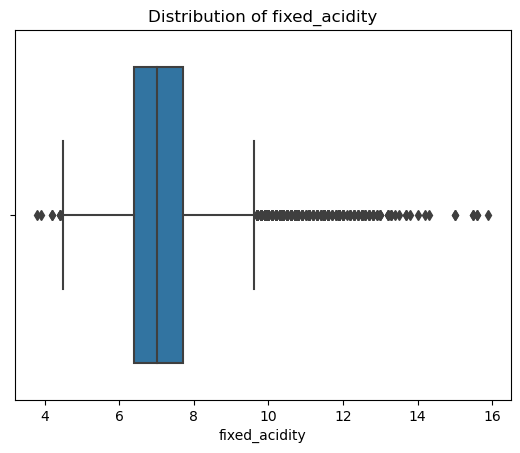

---------------------------


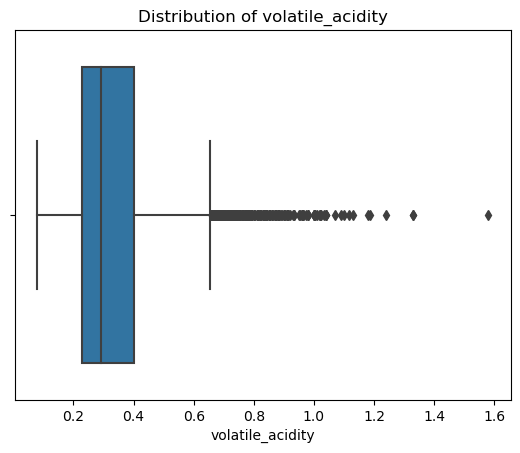

---------------------------


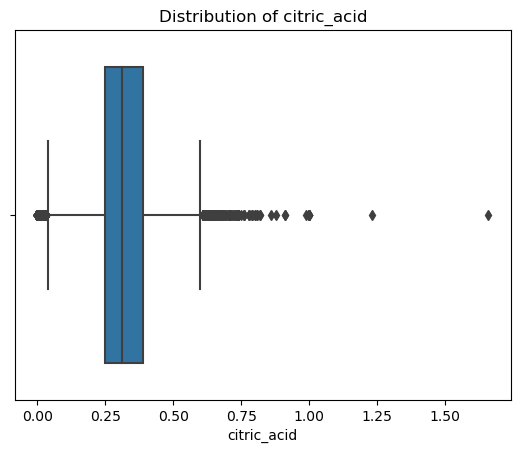

---------------------------


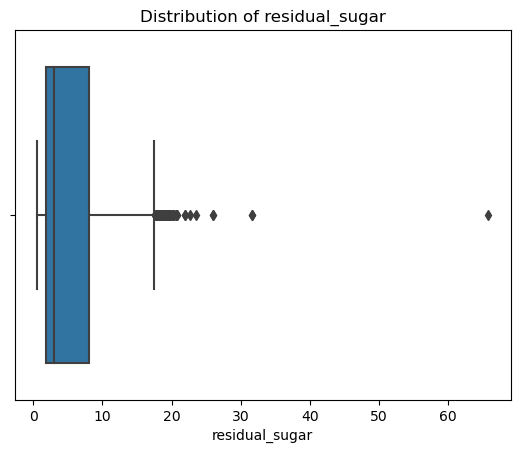

---------------------------


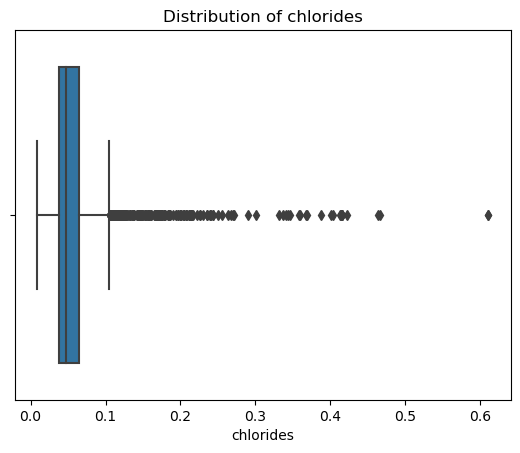

---------------------------


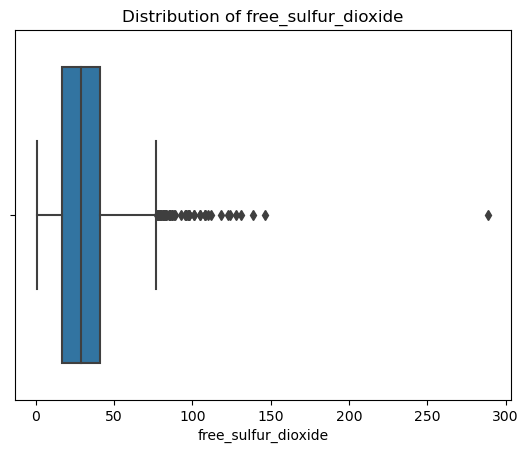

---------------------------


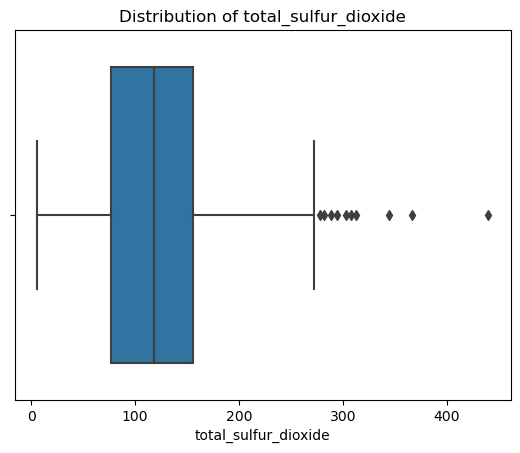

---------------------------


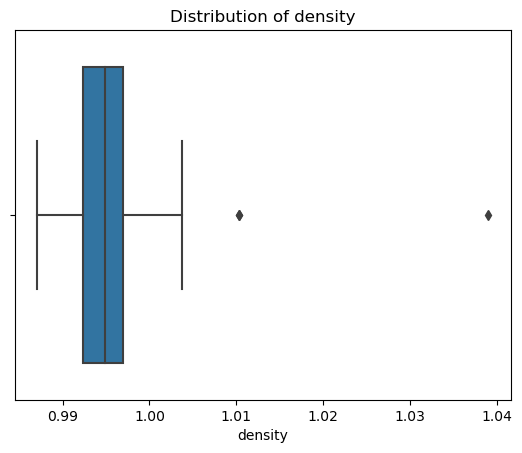

---------------------------


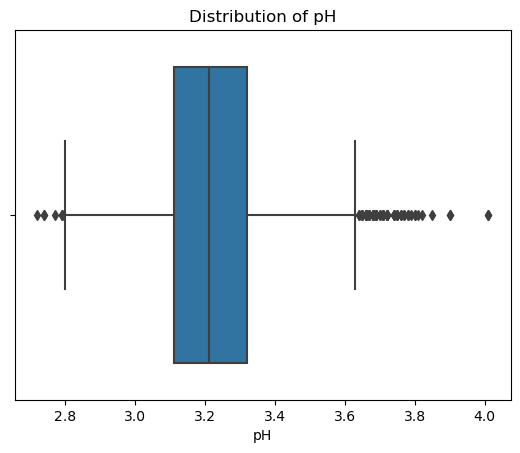

---------------------------


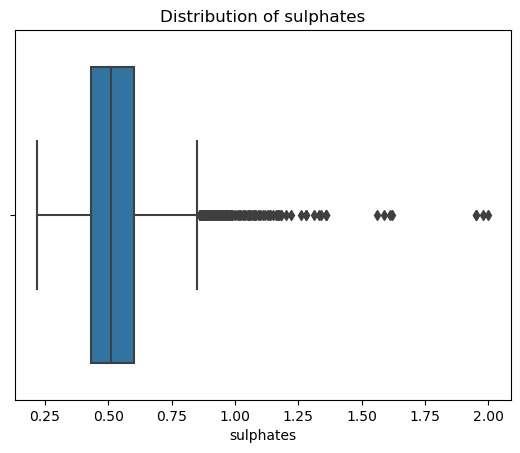

---------------------------


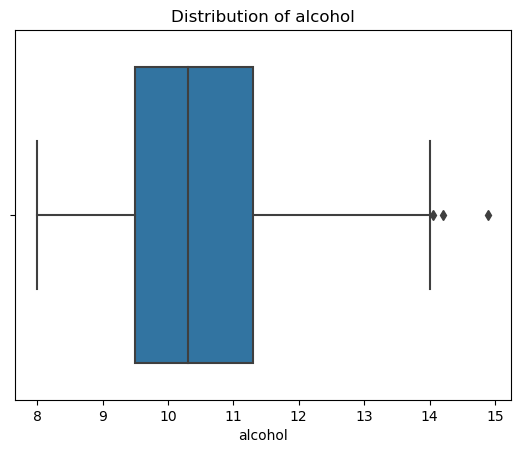

---------------------------


In [13]:
# only plot numerical distributions
for col in num_cols: 
    sns.boxplot(data = df, x = col)
    plt.title(f'Distribution of {col}')
    plt.show()
    print('---------------------------')

In [14]:
# want to remove the outliers
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:
        
        # For each column, it calculates the first quartile (q1) and 
        #third quartile (q3) using the .quantile() method, where q1 
        #corresponds to the 25th percentile and q3 corresponds to the 75th percentile.
        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [15]:
# remove outliers from numeric columns: 
df = remove_outliers(df, 3, num_cols)

In [16]:
#percentage: 
((6497 - df.shape[0])/6497) *100

5.217792827458827

How much data do we lose? <br>
K of 3 = 5% <br>
K of 2 = 13% <br>
K of 1.5 = 33% <br>